# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Insightful summary"
InsertApproach = "03-insightful-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_ael_shear_modulus_vrh,AFLOWML|ml_agl_debye,AFLOWML|ml_agl_heat_capacity_Cp_300K,AFLOWML|ml_agl_heat_capacity_Cp_300K_per_atom,AFLOWML|ml_agl_heat_capacity_Cv_300K,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,AFLOWML|ml_egap_type_Insulator,candidate
0,mvc-12905,Fe4O8,3.0,26,-0.295049,3.0,26,-0.295049,0.040992,0.067233,...,74.980,559.793,29.522,2.614,29.011,2.488,2.762,0.000060,1,0.0
1,mp-24,C8,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,490.162,2012.191,4.036,0.679,4.262,0.634,3.043,0.000086,1,1.0
2,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,521.822,2076.203,1.740,0.629,1.816,0.588,3.223,0.000086,1,1.0
3,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,505.647,2070.786,1.149,0.658,1.139,0.617,4.279,0.000086,1,1.0
4,mp-149,Si2,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,49.213,560.299,5.108,2.666,4.739,2.577,3.417,0.000061,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,58.263,362.421,122.952,2.800,118.318,2.709,2.690,0.000052,1,0.0
586,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,81.354,521.151,51.377,2.650,53.364,2.515,2.749,0.000060,0,0.0
587,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,82.942,521.152,64.432,2.666,63.321,2.496,2.841,0.000060,0,0.0
588,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,72.603,505.797,34.850,2.733,35.375,2.654,2.725,0.000061,0,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(24614, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
15385,mp-630227,C60,C,0.0,0.433807,0.0,0.000000,0.0,0.476389,0.0,0.240796
16153,mp-667273,C60,C,1.0,0.874914,0.0,0.000000,0.0,0.440000,0.0,0.402958
16406,mp-680372,C60,C,0.0,0.313422,0.0,0.000000,0.0,0.400317,0.0,0.116961
16481,mp-683919,C140,C,0.0,0.358009,0.0,0.000000,0.0,0.360000,0.0,0.006752
21329,mp-1194362,C28,C,0.0,0.053399,0.0,0.018587,0.0,0.467500,0.0,0.015358
22128,mp-1196583,C240,C,1.0,0.693451,0.0,0.000000,0.0,0.310000,0.0,0.002193
24102,mp-1203645,C48,C,0.0,0.037840,1.0,1.000000,0.0,0.421429,0.0,0.007918
24551,mp-1205417,C20,C,1.0,0.763506,0.0,0.018587,0.0,0.223333,0.0,0.005828


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
44,mp-344,B4N4,BN,0.0,0.368908,1.0,0.888889,1.0,0.665064,1.0,0.978666
238,mp-1599,B4N4,BN,0.0,0.315578,1.0,1.000000,0.0,0.318112,1.0,0.826922
241,mp-1639,B1N1,BN,1.0,0.999891,1.0,0.959459,1.0,0.777815,1.0,0.997104
385,mp-2653,B2N2,BN,1.0,0.999107,1.0,0.959459,1.0,0.785501,1.0,0.997153
3088,mp-13151,B4N4,BN,1.0,0.998157,1.0,0.888889,1.0,0.704531,1.0,0.989108
5149,mp-20305,In1As1,InAs,1.0,0.890361,0.0,0.000000,1.0,0.500717,0.0,0.046679
15781,mp-644751,B4N4,BN,1.0,0.981835,1.0,0.888889,0.0,0.477601,0.0,0.362146
19246,mp-1077506,B3N3,BN,1.0,0.661792,1.0,0.888889,0.0,0.418571,1.0,0.680031


In [10]:
atleast_one_model = Summary[(Summary["RF "] == 1) | 
                       (Summary["DT "] == 1) |
                       (Summary["GB "] == 1) | 
                       (Summary["LOG "] == 1)]

atleast_one_model.to_csv(models_dir / InsertApproach / "summary" / "atleast_one_model.csv")
atleast_one_model

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mp-7,S6,S,1.0,0.598674,0.0,0.400000,1.0,0.647200,1.0,0.981282
1,mp-14,Se3,Se,1.0,0.835284,1.0,0.959459,1.0,0.629434,0.0,0.477746
2,mp-19,Te3,Te,1.0,0.789933,1.0,0.959459,0.0,0.427531,0.0,0.016642
3,mp-25,N8,N2,1.0,0.941349,0.0,0.400000,1.0,0.567684,1.0,0.979574
4,mp-77,S32,S,1.0,0.560646,0.0,0.018587,0.0,0.403333,0.0,0.470994
...,...,...,...,...,...,...,...,...,...,...,...
24375,mp-1204768,Li8B48H132N28,Li2B12H33N7,0.0,0.013799,1.0,1.000000,0.0,0.300294,1.0,0.577723
24392,mp-1204824,Li4B4H32N8,LiB(H4N)2,0.0,0.035898,1.0,1.000000,0.0,0.252516,1.0,0.622949
24512,mp-1205326,Tb7Pt1I12,Tb7PtI12,0.0,0.066183,0.0,0.018587,0.0,0.349246,1.0,0.982325
24551,mp-1205417,C20,C,1.0,0.763506,0.0,0.018587,0.0,0.223333,0.0,0.005828


## How many entries does the models agree on? 

In [11]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
7,mp-111,Ne1,Ne,1.0,0.999749,1.0,0.959459,1.0,0.700230,1.0,0.951907
10,mp-147,Se6,Se,1.0,0.573968,1.0,0.959459,1.0,0.584573,1.0,0.945412
15,mp-189,Si4Ru4,SiRu,1.0,0.604836,1.0,0.959459,1.0,0.693118,1.0,0.980515
27,mp-252,Be1Te1,BeTe,1.0,0.803121,1.0,0.959459,1.0,0.776303,1.0,0.955265
135,mp-938,Ge1Te1,GeTe,1.0,0.593217,1.0,0.959459,1.0,0.530327,1.0,0.865107
...,...,...,...,...,...,...,...,...,...,...,...
19396,mp-1079201,B2C4N2,BC2N,1.0,0.997324,1.0,0.888889,1.0,0.778031,1.0,0.988445
19823,mp-1104073,C11N4,C11N4,1.0,0.979759,1.0,0.888889,1.0,0.618571,1.0,0.525333
19844,mp-1104326,Ho2V2O8,HoVO4,1.0,1.000000,1.0,1.000000,1.0,0.620000,1.0,0.997603
20546,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.000000,1.0,0.522333,1.0,0.668594


In [12]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
862,mp-4524,Zn2Ge2P4,ZnGeP2,1.0,0.908094,1.0,0.959459,1.0,0.820188,1.0,0.997297
5773,mp-23158,He1,He,1.0,1.000000,1.0,0.959459,1.0,0.812487,1.0,0.997477
15381,mp-629458,B1C2N1,BC2N,1.0,0.999050,1.0,0.959459,1.0,0.838031,1.0,0.995945
18719,mp-999498,N4,N2,1.0,0.941501,1.0,0.888889,1.0,0.846558,1.0,0.990028
18757,mp-1008523,B1C2N1,BC2N,1.0,0.999292,1.0,0.959459,1.0,0.808571,1.0,0.997153
18790,mp-1009792,Ru1C1,RuC,1.0,0.847570,1.0,0.959459,1.0,0.813300,1.0,0.988016


In [13]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
7,mp-111,Ne1,Ne,1.0,0.999749,1.0,0.959459,1.0,0.700230,1.0,0.951907
10,mp-147,Se6,Se,1.0,0.573968,1.0,0.959459,1.0,0.584573,1.0,0.945412
13,mp-160,B12,B,0.0,0.396098,1.0,0.888889,1.0,0.682444,1.0,0.765719
15,mp-189,Si4Ru4,SiRu,1.0,0.604836,1.0,0.959459,1.0,0.693118,1.0,0.980515
27,mp-252,Be1Te1,BeTe,1.0,0.803121,1.0,0.959459,1.0,0.776303,1.0,0.955265
...,...,...,...,...,...,...,...,...,...,...,...
20546,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.000000,1.0,0.522333,1.0,0.668594
21205,mp-1193675,B28,B,0.0,0.319106,1.0,0.888889,1.0,0.653915,1.0,0.705397
22119,mp-1196569,Mg17Si20O60,Mg17(SiO3)20,0.0,0.208184,1.0,0.959459,1.0,0.536433,1.0,0.773854
22549,mp-1198022,Ge34,Ge,1.0,0.868757,1.0,0.959459,1.0,0.758402,1.0,0.995713


In [14]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
27,mp-252,Be1Te1,BeTe,1.0,0.803121,1.0,0.959459,1.0,0.776303,1.0,0.955265
151,mp-1070,Cd2Se2,CdSe,1.0,0.864988,1.0,0.959459,1.0,0.787396,1.0,0.978497
217,mp-1479,B1P1,BP,1.0,0.938128,1.0,0.959459,1.0,0.776569,1.0,0.989105
224,mp-1541,Be1Se1,BeSe,1.0,0.873370,1.0,0.959459,1.0,0.799646,1.0,0.978091
241,mp-1639,B1N1,BN,1.0,0.999891,1.0,0.959459,1.0,0.777815,1.0,0.997104
385,mp-2653,B2N2,BN,1.0,0.999107,1.0,0.959459,1.0,0.785501,1.0,0.997153
862,mp-4524,Zn2Ge2P4,ZnGeP2,1.0,0.908094,1.0,0.959459,1.0,0.820188,1.0,0.997297
3064,mp-13031,Mg1Se1,MgSe,1.0,0.840868,1.0,0.959459,1.0,0.770713,1.0,0.898491
3066,mp-13033,Mg1Te1,MgTe,1.0,0.928026,1.0,0.959459,1.0,0.771559,1.0,0.958576
5614,mp-22913,Cu1Br1,CuBr,0.0,0.412027,1.0,0.959459,1.0,0.799257,1.0,0.994044


In [15]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mp-7,S6,S,1.0,0.598674,0.0,0.400000,1.0,0.647200,1.0,0.981282
3,mp-25,N8,N2,1.0,0.941349,0.0,0.400000,1.0,0.567684,1.0,0.979574
7,mp-111,Ne1,Ne,1.0,0.999749,1.0,0.959459,1.0,0.700230,1.0,0.951907
10,mp-147,Se6,Se,1.0,0.573968,1.0,0.959459,1.0,0.584573,1.0,0.945412
11,mp-154,N8,N2,1.0,0.935094,0.0,0.400000,1.0,0.548184,1.0,0.927908
...,...,...,...,...,...,...,...,...,...,...,...
21838,mp-1195735,Te24As16,Te3As2,0.0,0.164518,0.0,0.000000,1.0,0.560477,1.0,0.976443
22083,mp-1196461,C156F84,C13F7,0.0,0.001204,0.0,0.400000,1.0,0.517695,1.0,0.976356
22119,mp-1196569,Mg17Si20O60,Mg17(SiO3)20,0.0,0.208184,1.0,0.959459,1.0,0.536433,1.0,0.773854
22549,mp-1198022,Ge34,Ge,1.0,0.868757,1.0,0.959459,1.0,0.758402,1.0,0.995713


In [16]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mp-7,S6,S,1.0,0.598674,0.0,0.400000,1.0,0.647200,1.0,0.981282
1,mp-14,Se3,Se,1.0,0.835284,1.0,0.959459,1.0,0.629434,0.0,0.477746
2,mp-19,Te3,Te,1.0,0.789933,1.0,0.959459,0.0,0.427531,0.0,0.016642
3,mp-25,N8,N2,1.0,0.941349,0.0,0.400000,1.0,0.567684,1.0,0.979574
4,mp-77,S32,S,1.0,0.560646,0.0,0.018587,0.0,0.403333,0.0,0.470994
...,...,...,...,...,...,...,...,...,...,...,...
22549,mp-1198022,Ge34,Ge,1.0,0.868757,1.0,0.959459,1.0,0.758402,1.0,0.995713
23688,mp-1202132,Sr5Ti7O19,Sr5Ti7O19,1.0,1.000000,0.0,0.018587,0.0,0.241429,0.0,0.004933
23946,mp-1203087,Ga4Hg11P4Cl16,Ga4Hg11(PCl4)4,1.0,0.547726,0.0,0.018587,0.0,0.031534,0.0,0.000471
24135,mp-1203760,Si28Tc16,Si7Tc4,1.0,0.580718,0.0,0.000000,0.0,0.347400,0.0,0.002623


In [17]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-19-03-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

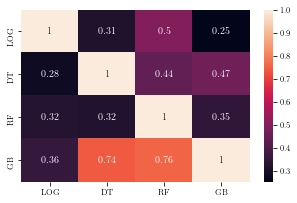

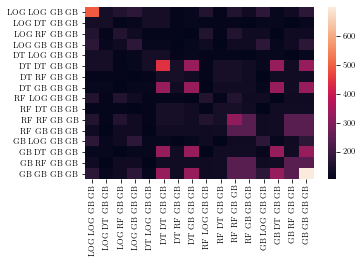

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

 43%|████▎     | 214/500 [00:00<00:00, 2136.36it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2102.21it/s]


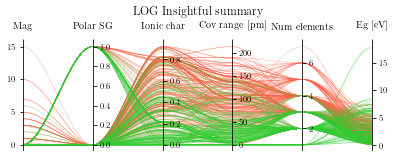

 44%|████▍     | 222/500 [00:00<00:00, 2214.64it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2188.83it/s]


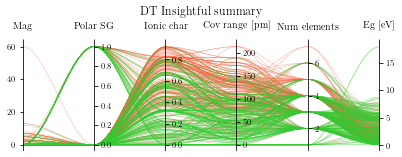

 45%|████▍     | 223/500 [00:00<00:00, 2223.85it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2156.93it/s]


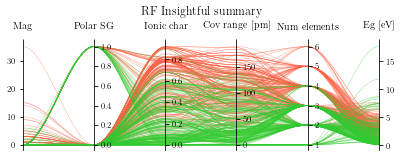

 43%|████▎     | 214/500 [00:00<00:00, 2132.97it/s]

250


100%|██████████| 500/500 [00:00<00:00, 2069.29it/s]


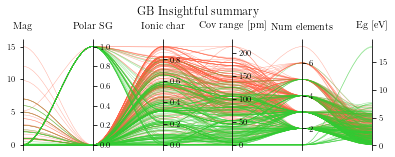

In [19]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)

0             Fe4O8
1                C8
2                C4
3                C2
4               Si2
           ...     
585    Co4Bi24S8O64
586    Sr4Mn2Mo2O12
587         Fe12O16
588       Sr8Co4O16
589        Rb1Cr5S8
Name: full_formula, Length: 590, dtype: object


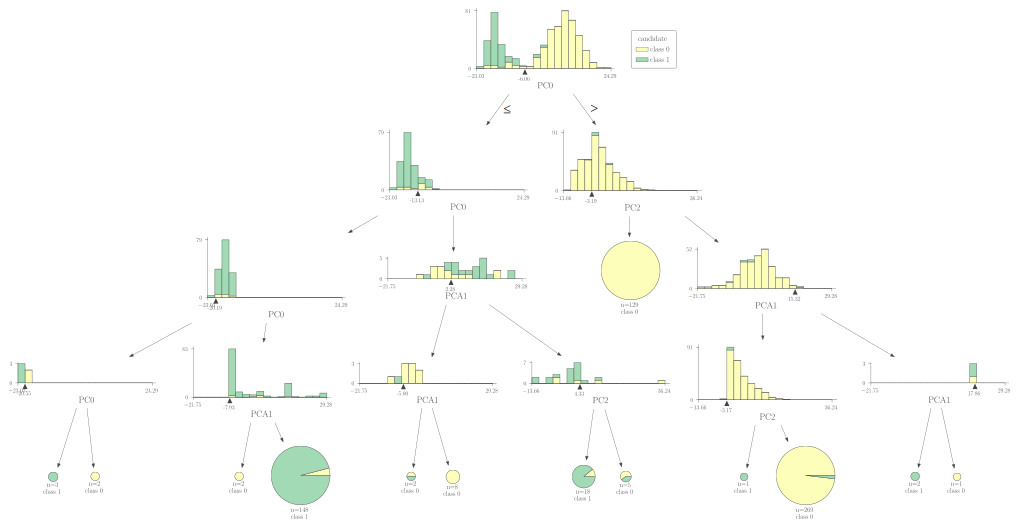

In [22]:
visualize.plot_2D3Dcontours(trainingSet, trainingSet[["candidate"]].values.reshape(-1,), Summary, abbreviations, InsertApproach, 176)

In [21]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_ael_shear_modulus_vrh,AFLOWML|ml_agl_debye,AFLOWML|ml_agl_heat_capacity_Cp_300K,AFLOWML|ml_agl_heat_capacity_Cp_300K_per_atom,AFLOWML|ml_agl_heat_capacity_Cv_300K,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,AFLOWML|ml_egap_type_Insulator,candidate
0,mvc-12905,Fe4O8,3.0,26,-0.295049,3.0,26,-0.295049,0.040992,0.067233,...,74.980,559.793,29.522,2.614,29.011,2.488,2.762,0.000060,1,0.0
1,mp-24,C8,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,490.162,2012.191,4.036,0.679,4.262,0.634,3.043,0.000086,1,1.0
2,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,521.822,2076.203,1.740,0.629,1.816,0.588,3.223,0.000086,1,1.0
3,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,505.647,2070.786,1.149,0.658,1.139,0.617,4.279,0.000086,1,1.0
4,mp-149,Si2,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,49.213,560.299,5.108,2.666,4.739,2.577,3.417,0.000061,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,58.263,362.421,122.952,2.800,118.318,2.709,2.690,0.000052,1,0.0
586,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,81.354,521.151,51.377,2.650,53.364,2.515,2.749,0.000060,0,0.0
587,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,82.942,521.152,64.432,2.666,63.321,2.496,2.841,0.000060,0,0.0
588,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,72.603,505.797,34.850,2.733,35.375,2.654,2.725,0.000061,0,0.0
